
# Project: Investigate a Dataset : Characteristics of No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset contains information about the whether the patients have attended their appointments or not. It has about 100K medical appointments throughout the year. The list might demonstrate the factors that have caused the patient to not show up to the appointment..

> Questions:
>1. What is the percentage of absence, and show up for the appointments?

>2. Can 1 patient have more than 1 appointment?

In [30]:
#import the necessary packages 

import numpy as nm
import pandas as pn
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

 > #### General Observations:

     The Dataset contains 110572 rows, and 14 columns.
    
     No duplicates 
    
     The datatype of AppointmentDay, and SchedualedDay had to be converted 
     to datetime64
    
     Spelling Mistakes in the columns

### General Properties

In [41]:
#Load the dataset 

df = pn.read_csv('noshowappointments-kagglev2-may-2016.csv')
def f1():
    
    return df.head()
f1()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [32]:
#dimension of the array
df.shape

(110527, 14)

In [33]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f121994a160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f12191cccc0>]], dtype=object)

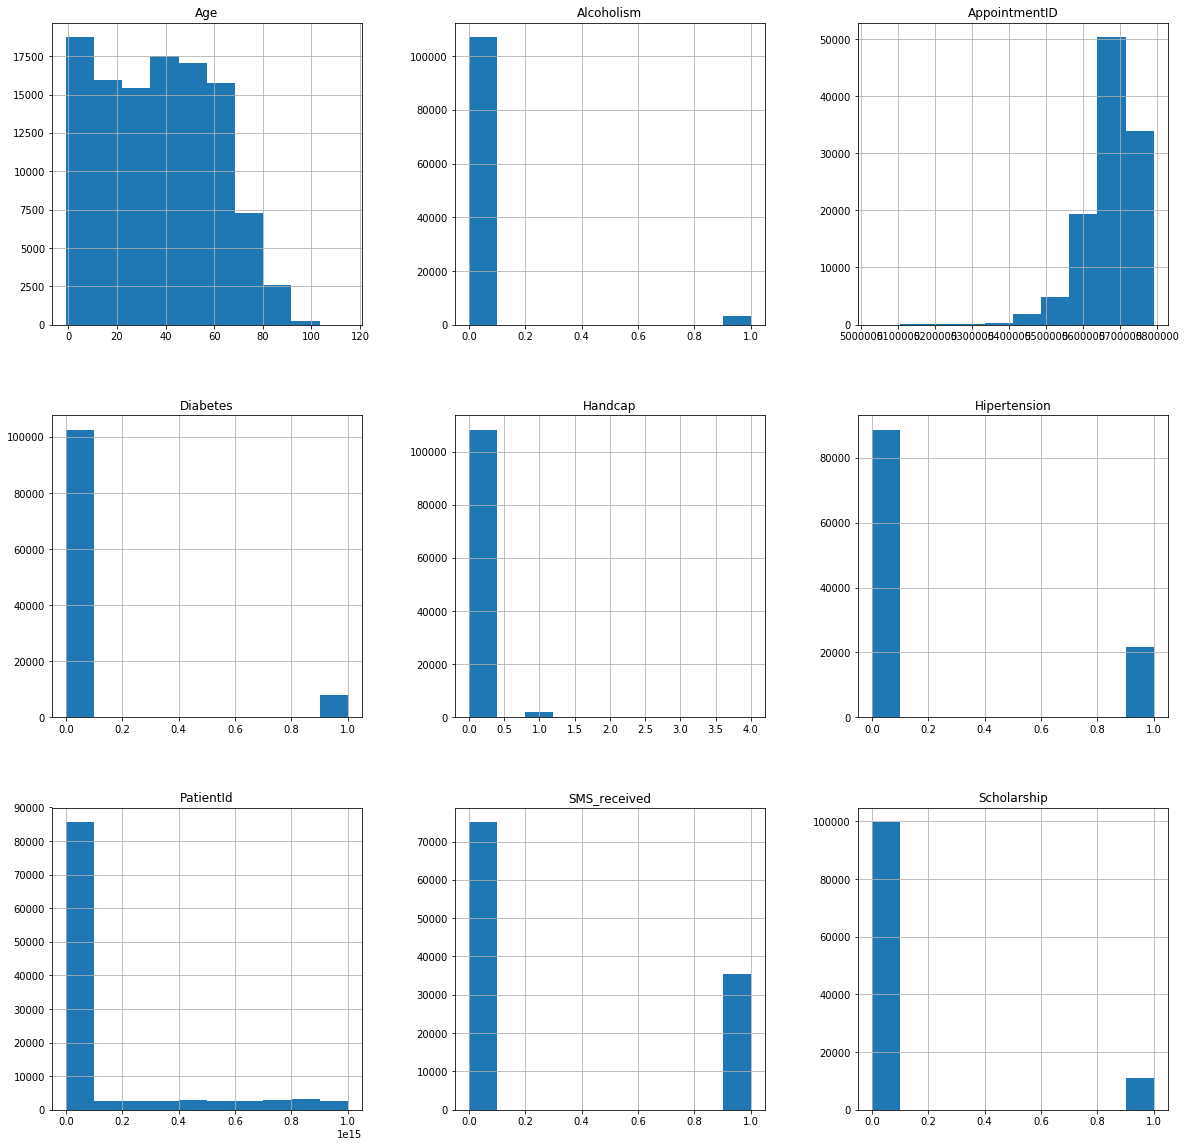

In [35]:
df.hist(figsize=(20,20))

### Observations:
##### Age: There are few old people in the dataset
##### Alcoholism: There are few alcohol addicts compared to non-alcoholics 
##### Diabetes: Few are diagnosed with diabetes 
##### Hypertension: Few people are diagnosed with hypertension, but compared to diabetes; more are diagnosed with hypertension than diabetes


In [36]:
#detect missing values in the array
pn.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

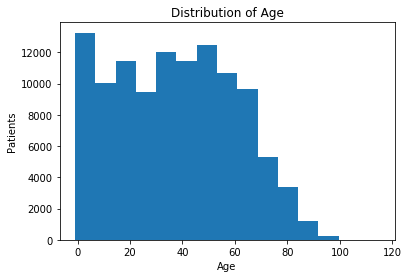

In [37]:
#Plot the age distribution
plt.figure();
age_hist = df['Age'].plot.hist(bins=15)
age_hist.set_ylabel("Patients")
age_hist.set_xlabel("Age")
age_hist.set_title('Distribution of Age');

In [38]:
#Check if there's an age less than 0
df[df["Age"] <= 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184430e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366230e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885170e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718820e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647130e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314930e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822850e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326990e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468590e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No


### Remove Age Outliers

In [39]:
df = df[(df.Age >= 0) & (df.Age <= 95)]
df.shape

(110480, 14)

In [40]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [41]:
#Convert (String) dates to DateTime
df.AppointmentDay=df.AppointmentDay.apply(nm.datetime64)

In [42]:
#Convert (String) dates to DateTime
df.ScheduledDay=df.ScheduledDay.apply(nm.datetime64)

In [43]:
df.nunique().sum()

275917


### Data Cleaning 

In [43]:
#Renaming columns with spelling mistakes
df.rename(columns={'Neighbourhood':'Neighborhood', 'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show':'Absence'}, inplace=True)
f1()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absence
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [46]:
#convert PatientId datatype to int
df.PatientId=df.PatientId.astype(int)

In [47]:
df.PatientId=df.PatientId.astype(str)

In [48]:
df.PatientId=df.PatientId.str.split('0', expand=True)

# <a id='eda'></a>
## Exploratory Data Analysis





In [44]:
#converted the datatype from string to int
df.loc[df['Absence'] == 'No', 'AbsenceInt'] = 0
df.loc[df['Absence'] == 'Yes', 'AbsenceInt'] = 1
df.AbsenceInt=df.AbsenceInt.astype(int)
f1()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absence,AbsenceInt
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [51]:
df.Gender.describe()
Gender_df = df['Gender'].value_counts()


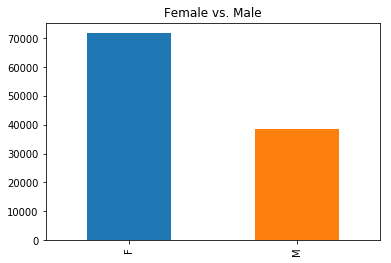

In [52]:
#Total appointments for Females and Males
Gender_df.plot(kind = 'bar', title = 'Female vs. Male')

The graph demonstrates that females have more appointments than males.

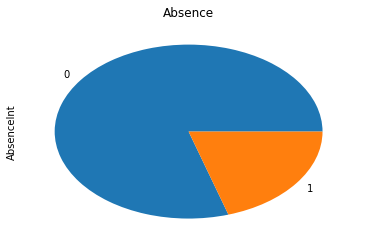

In [53]:
#Absence pie chart 
df.AbsenceInt.describe()
AbsenceInt_df = df['AbsenceInt'].value_counts()
AbsenceInt_df.plot(kind = 'pie', title = 'Absence')

In [ ]:
The graph shows that few people missed their appointment.

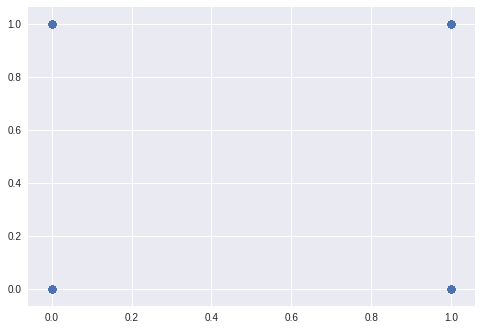

In [67]:
plt.scatter(df.Hypertension, df.SMS_received)


There is no pattern observed since the values for both variables are considered to be 1's and 0's.

### Research Question 1

## Percentage of patients that have missed their scheduled appointments

In [ ]:
Absence = df["Absence"].value_counts()
print(Absence)
percentage_Absence = Absence[1]/ Absence.sum() * 100
print("Percentage of patients that have missed their scheduled appointments:",percentage_Absence )

### Research Question 2 

## Do we have patients with more than one appointment?

In [45]:
df.PatientId.value_counts().iloc[0:10]


8.221460e+14    88
9.963767e+10    84
2.688610e+13    70
3.353480e+13    65
7.579750e+13    62
8.713750e+14    62
2.584240e+11    62
6.264200e+12    62
6.684490e+13    57
8.722790e+11    55
Name: PatientId, dtype: int64

Most patients have more than 1 appointment. 

<a id='conclusions'></a>
## Conclusions
Some patients tends to have more than 1 appointment 

Few patients have missed their appointments compared to the ones that have attended 

Age can be an indicator of not showing up to the appointment

The age 0 in the list can be replaced with a proper age, either with decimals or by listing the month to illustrate the age of the newborn, unless it's unknown

The dataset lacked the appointment's time, therefore I wasn't able to find the time it took for the patients to wait for their appointments. There can't be a scatter plot relationship between any of the variables unless it's time.

Females have more appointments.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])